# Laboratorio Integrador #2

En el siguiente laboratorio los estudiantes deben trabajar con un dataset de **baja numerosidad-baja dimensionalidad** y aplicar las técnicas de clusterización estudiadas en clases.

Objetivo:
*   Implementar un modelo de clasificación no supervisada sobre el espacio original de los datos.
*   Analizar los resultados de clasificación obtenidos por los algoritmos de clusterización (k-means, Hierarchical Clustering, GMM, Spectral Clustering).

Actividad Evaluativa:
1.   Es un trabajo individual.
2.   Implementar y aplicar los algoritmos k-means, Hierarchical Clustering, GMM, Spectral Clustering en el espacio original (***dataset(wq).xlsx***). 
3.   Medir el desempeño de clasificación para cada ecenario usando las tres métricas no supervisadas (Silhouette Coefficient, Calinski-Harabasz Index, Davies-Bouldin Index).
4.   Optimizar el número de clústers en el intervalo k=2..8 y plotear los resultados de clusterización (2D o 3D). Además, para el caso del k-means, mostrar el elbow plot, para el GMM, mostrar un plot con los valores del Bayesian Information Criterion (BIC) o el Akaike Information Criterion (AIC) para cada clusterización, y para el Hierarchical Clustering, mostrar el dendograma.
5.   Utilizar un algoritmo de reducción de dimensionalidad no lineal estudiado para reducir el espacio de clasificación a 3 componentes y aplicar el paso previo (punto 4) al nuevo espacio.
6.   Presentar un análisis de resultados de acuerdo a las métricas calculadas y plots generados donde se evidencie la comparativa entre ecenarios y la selección del número de clústers ideal.
7.   Subir el cuaderno desarrollado a la carpeta de trabajo en el D2L.


Valor:
*   25 puntos

Penalizaciones:
*   Cualquier error de implementación o concepto, se penalizará con -1 punto (acumulativo).
*   La no realización del punto 2 de la actividad se penalizará con el 45% (11.25 puntos).
*   La no realización del punto 3 de la actividad se penalizará con el 10% (2.5 puntos).
*   La no realización del punto 4 de la actividad se penalizará con el 15% (3.75 puntos).
*   La no realización del punto 5 de la actividad se penalizará con el 15% (3.75 puntos).
*   La no realización del punto 6 de la actividad se penalizará con el 15% (3.75 puntos).
*   La no realización del punto 7 de la actividad se penalizará con el 100% (25 puntos).



# *Setup*
Overall libraries for data handling, visualization, preparation, and evaluation

In [94]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import io
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load and Explore data

In [95]:
# Load datasets
file_path = 'wine-quality.csv'
data = pd.read_csv(file_path)
# data = pd.read_excel(file_path)
# Replace periods in large numbers and convert to numeric
data = data.applymap(lambda x: float(str(x).replace('.', '')) if isinstance(x, str) and x.replace('.', '').isdigit() else x)

# Check for any non-numeric columns and drop them or encode them if necessary
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()  # Drop rows with any NaN values (optional)
data = data.drop(columns=['quality'])


# Preview data
data.head()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_101888\1717782801.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: float(str(x).replace('.', '')) if isinstance(x, str) and x.replace('.', '').isdigit() else x)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [96]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


## Data preprocessing 

In [97]:
# Convert DataFrame to NumPy array for clustering and plotting
X = data.to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering


---



## Original space

## k-Means

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Rango de valores de k
k_range = range(2, 11)

# Listas para guardar resultados
silhouette_scores = []
calinski_scores = []
davies_scores = []
elbow = []
labels = []
# Calcular métricas para cada k
ica = FastICA(n_components=2)
X_reduced = ica.fit_transform(X)

for i, k in enumerate(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels.append(kmeans.fit_predict(X))
    elbow.append(kmeans.inertia_)

    silhouette = silhouette_score(X, labels[i])
    calinski = calinski_harabasz_score(X, labels[i])
    davies = davies_bouldin_score(X, labels[i])

    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    davies_scores.append(davies)

# Crear DataFrame con resultados
df_metrics = pd.DataFrame(
    {
        "k": list(k_range),
        "Silhouette": silhouette_scores,
        "Calinski_Harabasz": calinski_scores,
        "Davies_Bouldin": davies_scores,
    }
)

# Mostrar el DataFrame
print(df_metrics)

    k  Silhouette  Calinski_Harabasz  Davies_Bouldin
0   2    0.506186        7323.607521        0.699212
1   3    0.412649        6823.701192        0.782206
2   4    0.374849        6518.858702        0.839174
3   5    0.343595        6047.120492        0.905123
4   6    0.314547        5605.860158        0.961583
5   7    0.314770        5330.221953        0.979807
6   8    0.299830        5069.470667        0.982968
7   9    0.302310        4965.901160        0.953937
8  10    0.306449        4886.741185        0.955153


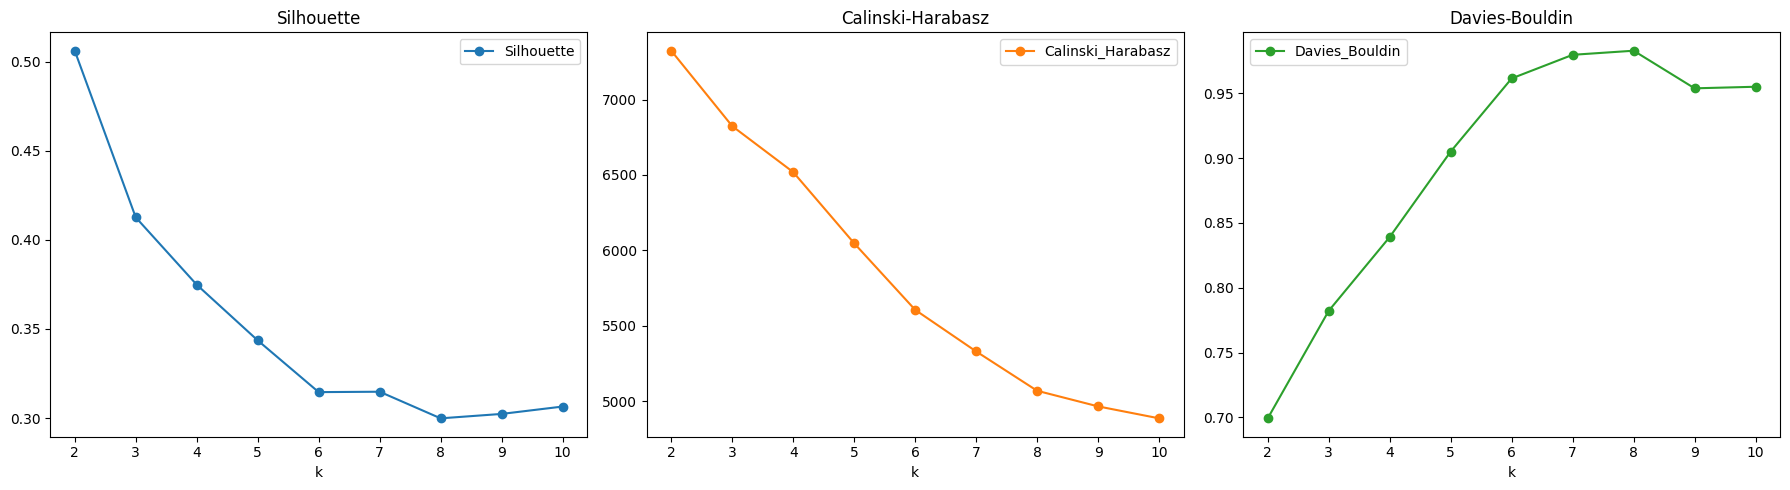

In [99]:
df_metrics.set_index("k").plot(marker="o", subplots=True, layout=(1, 3), figsize=(18, 5), title=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
plt.tight_layout()
plt.show()

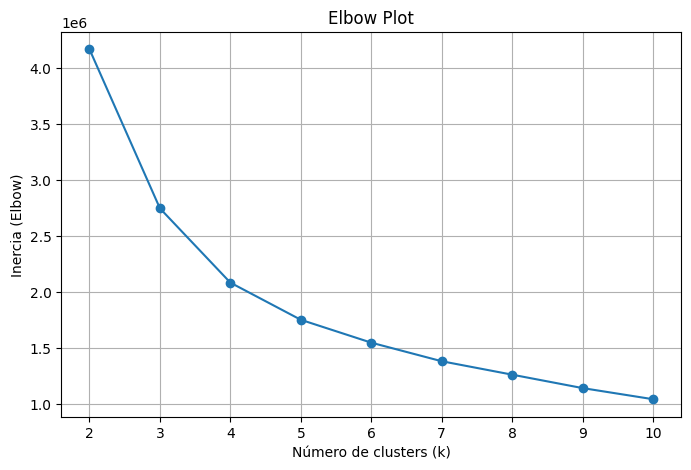

In [100]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, elbow, marker='o')  # 'o' es el marcador de círculo
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Elbow)')
plt.title('Elbow Plot')
plt.grid(True)
plt.show()


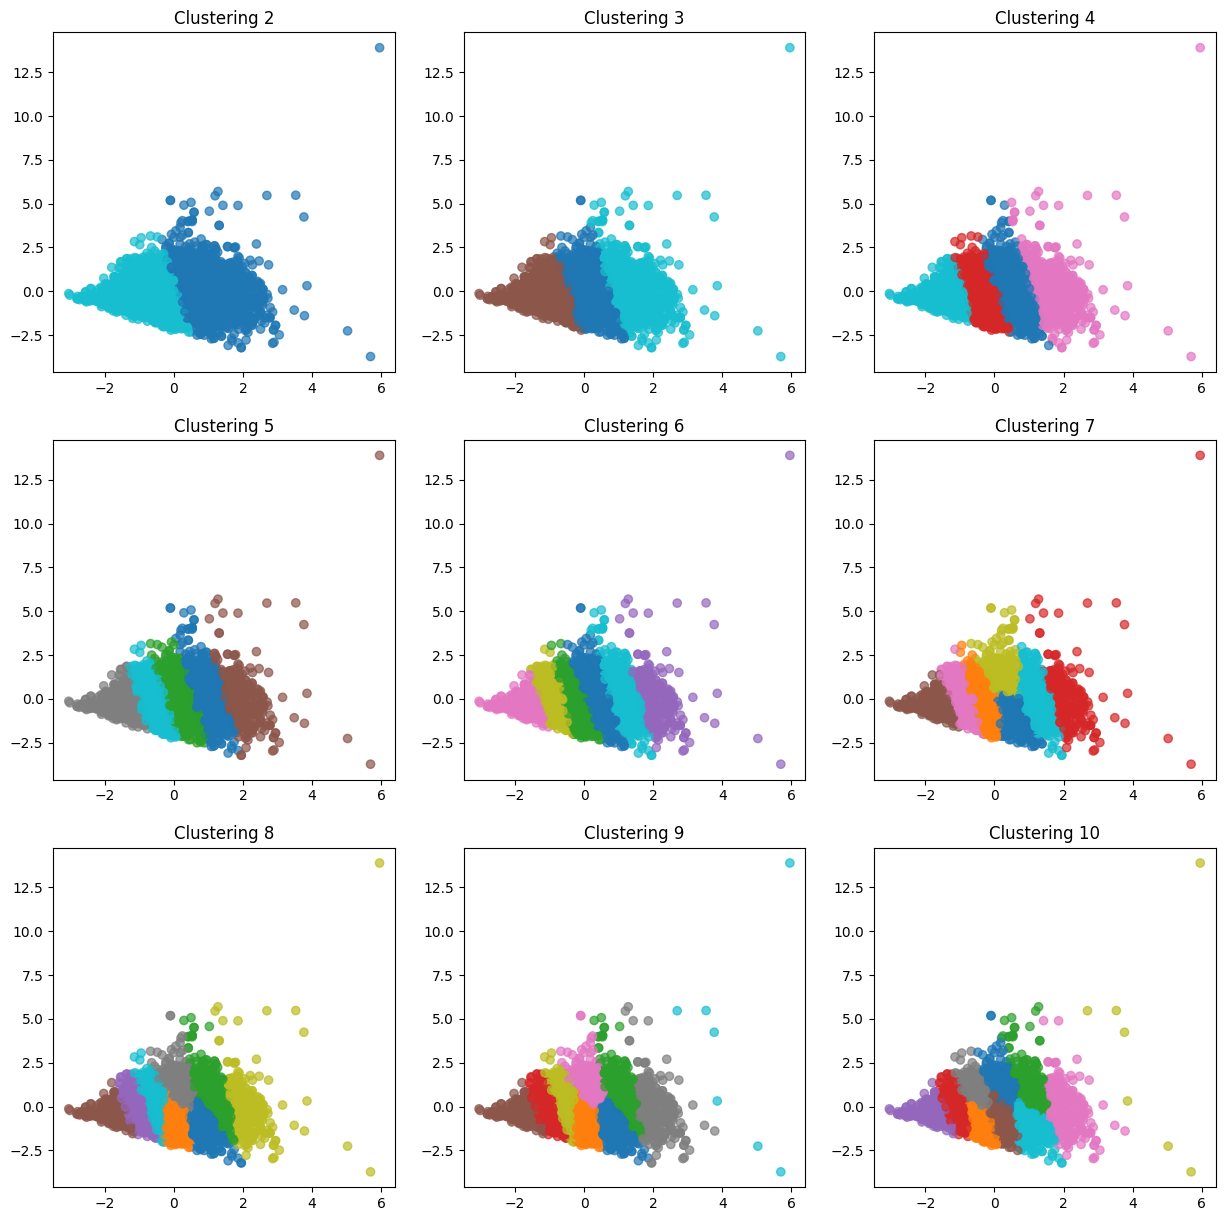

In [101]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
axes = axes.flatten()
for i, lab in enumerate(labels):
    axes[i].scatter(X_reduced[:, 0], X_reduced[:, 1], c=lab, cmap='tab10', alpha=0.7)
    axes[i].set_title(f'Clustering {k_range[i]}')


## Herarchical Clustering|

In [102]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Rango de valores de k
k_range = range(2, 11)

# Listas para guardar resultados
silhouette_scores = []
calinski_scores = []
davies_scores = []
elbow = []
labels = []
# Calcular métricas para cada k
ica = FastICA(n_components=2)
X_reduced = ica.fit_transform(X)

for i, k in enumerate(k_range):
    kmeans = AgglomerativeClustering(n_clusters=k)
    labels.append(kmeans.fit_predict(X))

    silhouette = silhouette_score(X, labels[i])
    calinski = calinski_harabasz_score(X, labels[i])
    davies = davies_bouldin_score(X, labels[i])

    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    davies_scores.append(davies)

# Crear DataFrame con resultados
df_metrics = pd.DataFrame(
    {
        "k": list(k_range),
        "Silhouette": silhouette_scores,
        "Calinski_Harabasz": calinski_scores,
        "Davies_Bouldin": davies_scores,
    }
)

# Mostrar el DataFrame
print(df_metrics)

    k  Silhouette  Calinski_Harabasz  Davies_Bouldin
0   2    0.496963        6950.033103        0.706653
1   3    0.350230        5745.069309        0.837836
2   4    0.324238        5716.290683        0.944659
3   5    0.289118        5224.445582        0.936042
4   6    0.280991        4893.362220        0.958048
5   7    0.278332        4734.395255        0.975019
6   8    0.251594        4597.317990        1.074732
7   9    0.251831        4359.683306        0.960064
8  10    0.246589        4220.553167        1.021308


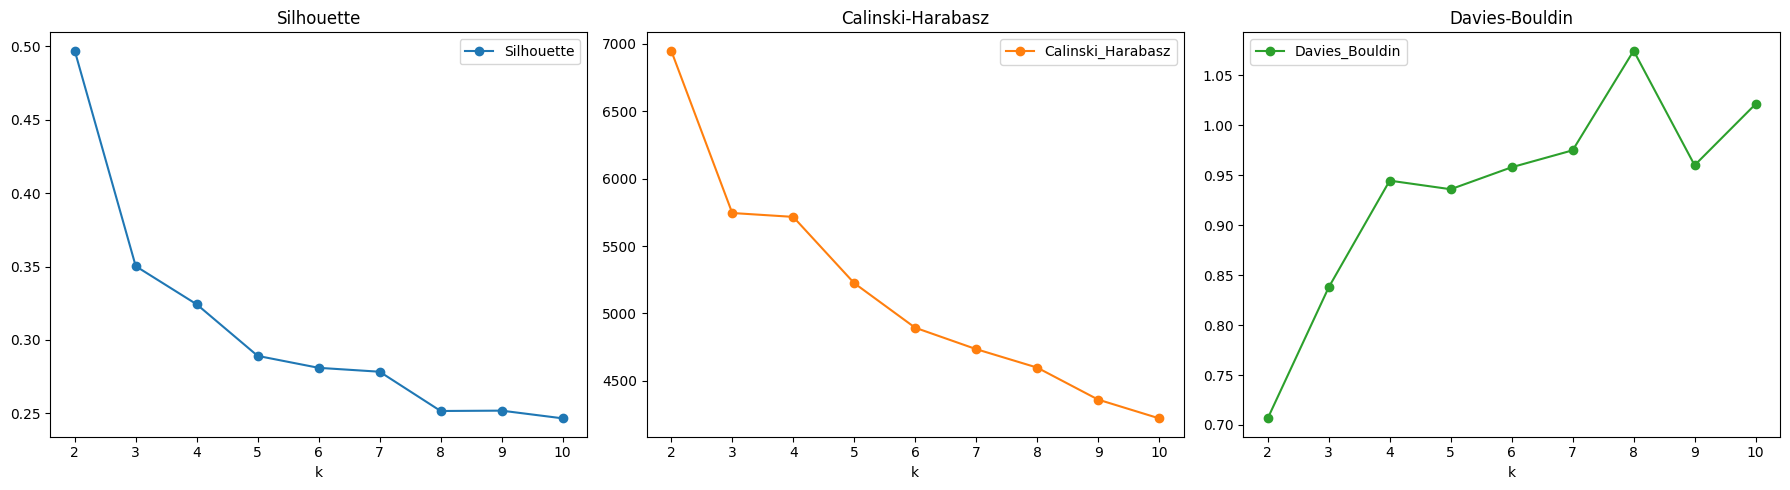

In [103]:
df_metrics.set_index("k").plot(marker="o", subplots=True, layout=(1, 3), figsize=(18, 5), title=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
plt.tight_layout()
plt.show()

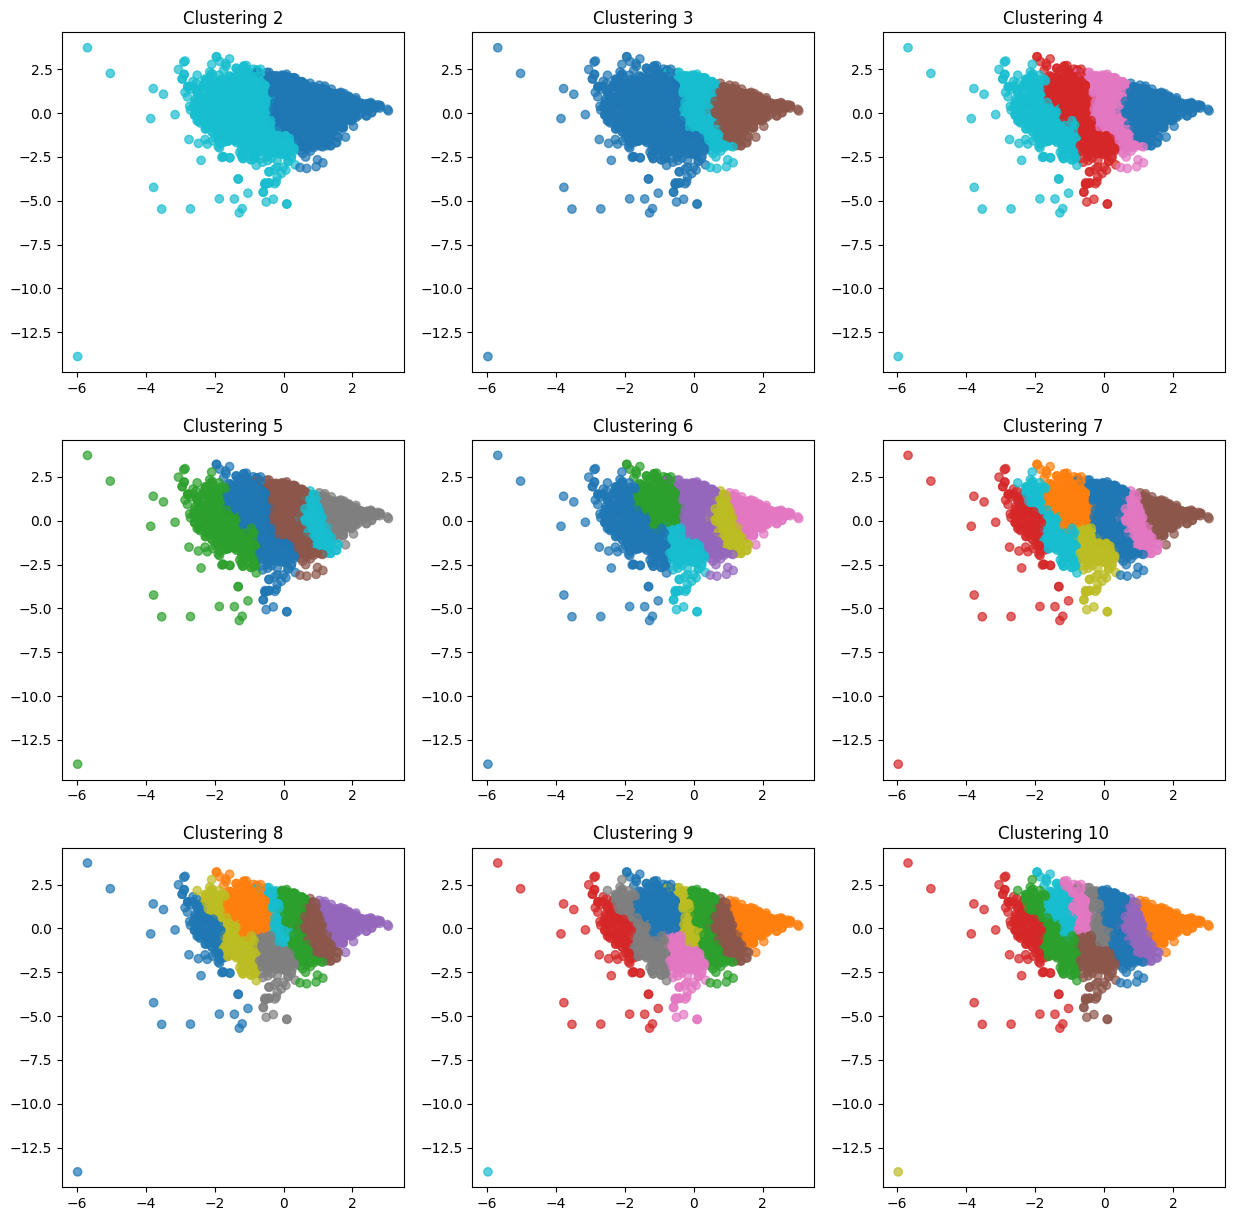

In [104]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
axes = axes.flatten()
for i, lab in enumerate(labels):
    axes[i].scatter(X_reduced[:, 0], X_reduced[:, 1], c=lab, cmap='tab10', alpha=0.7)
    axes[i].set_title(f'Clustering {k_range[i]}')


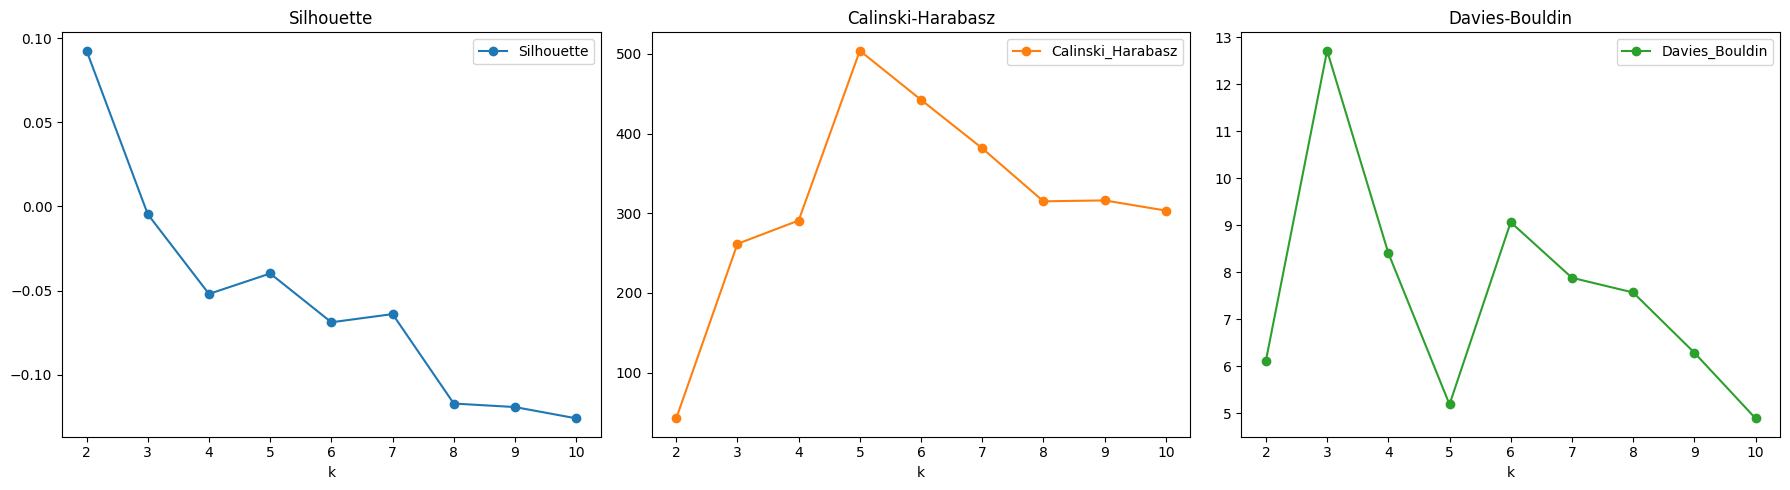

In [108]:
df_metrics.set_index("k").plot(marker="o", subplots=True, layout=(1, 3), figsize=(18, 5), title=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
plt.tight_layout()
plt.show()

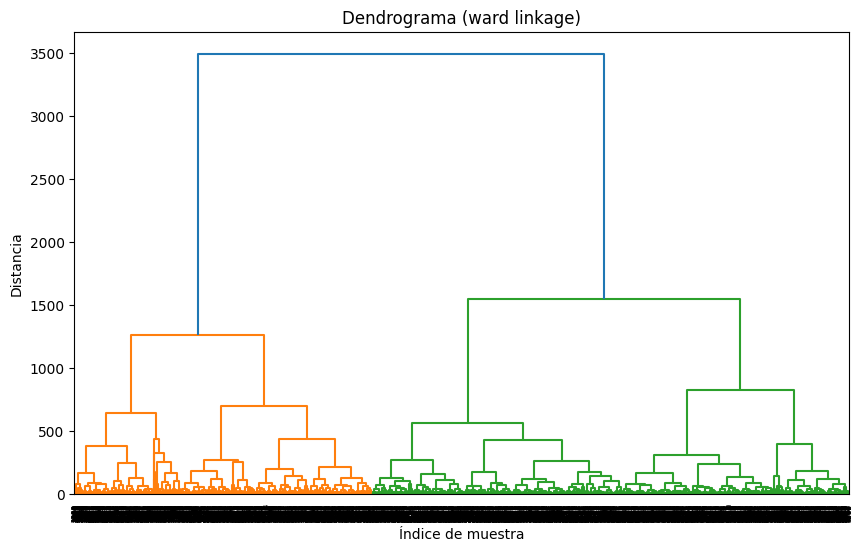

In [105]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='ward')  # 'ward' es compatible con AgglomerativeClustering
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrograma (ward linkage)")
plt.xlabel("Índice de muestra")
plt.ylabel("Distancia")
plt.show()


## GMM

In [106]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Rango de valores de k
k_range = range(2, 11)

# Listas para guardar resultados
silhouette_scores = []
calinski_scores = []
davies_scores = []
elbow = []
labels = []
# Calcular métricas para cada k
ica = FastICA(n_components=2)
X_reduced = ica.fit_transform(X)

for i, k in enumerate(k_range):
    kmeans = GaussianMixture(n_components=k)
    labels.append(kmeans.fit_predict(X))

    silhouette = silhouette_score(X, labels[i])
    calinski = calinski_harabasz_score(X, labels[i])
    davies = davies_bouldin_score(X, labels[i])

    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    davies_scores.append(davies)

# Crear DataFrame con resultados
df_metrics = pd.DataFrame(
    {
        "k": list(k_range),
        "Silhouette": silhouette_scores,
        "Calinski_Harabasz": calinski_scores,
        "Davies_Bouldin": davies_scores,
    }
)

# Mostrar el DataFrame
print(df_metrics)

    k  Silhouette  Calinski_Harabasz  Davies_Bouldin
0   2    0.092635          42.787235        6.116292
1   3   -0.004610         261.639878       12.716636
2   4   -0.052010         290.870921        8.408203
3   5   -0.039856         503.821917        5.183814
4   6   -0.068868         442.226745        9.064129
5   7   -0.063998         381.410082        7.881186
6   8   -0.117199         314.946348        7.567557
7   9   -0.119291         316.089068        6.286197
8  10   -0.126000         303.336809        4.887185


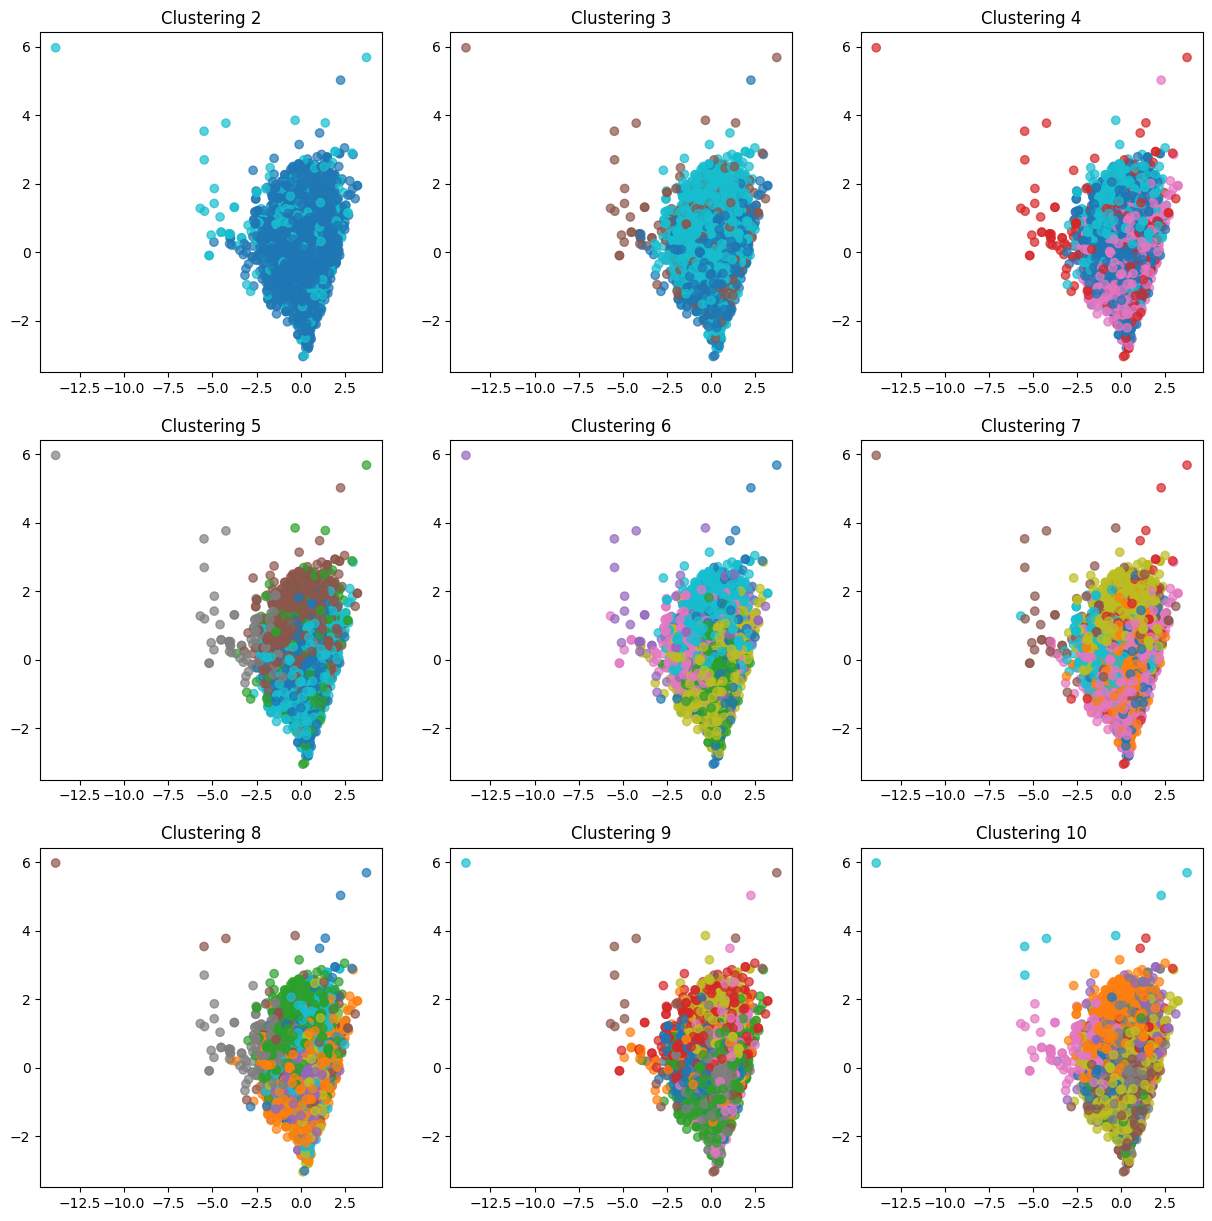

In [107]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
axes = axes.flatten()
for i, lab in enumerate(labels):
    axes[i].scatter(X_reduced[:, 0], X_reduced[:, 1], c=lab, cmap='tab10', alpha=0.7)
    axes[i].set_title(f'Clustering {k_range[i]}')

## Spectral Clustering

In [109]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Rango de valores de k
k_range = range(2, 11)

# Listas para guardar resultados
silhouette_scores = []
calinski_scores = []
davies_scores = []
elbow = []
labels = []
# Calcular métricas para cada k
ica = FastICA(n_components=2)
X_reduced = ica.fit_transform(X)

for i, k in enumerate(k_range):
    kmeans = SpectralClustering(n_components=k)
    labels.append(kmeans.fit_predict(X))

    silhouette = silhouette_score(X, labels[i])
    calinski = calinski_harabasz_score(X, labels[i])
    davies = davies_bouldin_score(X, labels[i])

    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    davies_scores.append(davies)

# Crear DataFrame con resultados
df_metrics = pd.DataFrame(
    {
        "k": list(k_range),
        "Silhouette": silhouette_scores,
        "Calinski_Harabasz": calinski_scores,
        "Davies_Bouldin": davies_scores,
    }
)

# Mostrar el DataFrame
print(df_metrics)

c:\Users\ASUS\Documents\Maestria\Semana_2_ANPS\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

# Reduced space by a non-linear model

## k-Means

## Herarchical Clustering

## GMM

## Spectral Clustering

## Results and Discusion

# Conclusions